# 2005 - 2015 New York Crimes

### Group 1 : Data Janitors - Mehak Singh Raheja | Rico Rey Francis Holganza Jr. | Guraz Buhariwala

In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


# <u> 1. Data Set Description <u>

<ul>
<li> <b> df </b>is a dataset that contains all the crimes that took place in New York City accross 5 boroughs between in 2005-2015. Each row represent one particular crime reported. </li>

Important columns in <b> df </b> are:
<ol>
<li><b>CMPLNT_NUM</b> :Randomly generated persistent ID for each complaint
<li><b>CMPLNT_FR_DT</b><font color =black> : Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)<br>
<li><b>CMPLNT_FR_TM</b><font color =black> :Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)<br>
<li><b>RPT_DT</b> :  Date event was reported to the police  <br>
<li><b>KY_CD</b><font color =black> :  Three digit offense classification code <br>
<li><b>OFNS_DESC</b><font color =black> : Description of offense corresponding with key code<br>
<li><b>LAW_CAT_CD</b><font color =black> : Level of offense: felony, misdemeanor, violation<br>
<li><b>JURIS_DESC</b><font color =black> : Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.<br>
<li><b>BORO_NM</b><font color =black> : The name of the borough in which the incident occurred i.e. Brooklyn or Queens or Manhattan or Bronx or Staten Island<br>
<li><b>ADDR_PCT_CD</b><font color =black> : The precinct in which the incident occurred<br>
<li><b>PREM_TYP_DESC</b><font color =black> : Specific description of premises; grocery store, residence, street, etc.<br>
<li><b>Latitude</b>	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
<li><b>Longitude</b>	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)


In [3]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/Users/gurazbuhariwala/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   101109527   12/31/2015     23:45:00          NaN          NaN  12/31/2015   
1   153401121   12/31/2015     23:36:00          NaN          NaN  12/31/2015   
2   569369778   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
3   968417082   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
4   641637920   12/31/2015     23:25:00   12/31/2015     23:30:00  12/31/2015   

   KY_CD                        OFNS_DESC  PD_CD  \
0    113                          FORGERY  729.0   
1    101  MURDER & NON-NEGL. MANSLAUGHTER    NaN   
2    117                  DANGEROUS DRUGS  503.0   
3    344     ASSAULT 3 & RELATED OFFENSES  101.0   
4    344     ASSAULT 3 & RELATED OFFENSES  101.0   

                          PD_DESC              ...               ADDR_PCT_CD  \
0  FORGERY,ETC.,UNCLASSIFIED-FELO              ...                      44.0   
1                             NaN              ...                     103.0   
2  CONTROLLED SUBSTANCE,INTENT TO              ...                      28.0   
3                       ASSAULT 3              ...                     105.0   
4                       ASSAULT 3              ...                      13.0   

  LOC_OF_OCCUR_DESC    PREM_TYP_DESC PARKS_NM  HADEVELOPT X_COORD_CD  \
0            INSIDE   BAR/NIGHT CLUB      NaN         NaN  1007314.0   
1           OUTSIDE              NaN      NaN         NaN  1043991.0   
2               NaN            OTHER      NaN         NaN   999463.0   
3            INSIDE  RESIDENCE-HOUSE      NaN         NaN  1060183.0   
4          FRONT OF            OTHER      NaN         NaN   987606.0   

  Y_COORD_CD   Latitude  Longitude                        Lat_Lon  
0   241257.0  40.828848 -73.916661  (40.828848333, -73.916661142)  
1   193406.0  40.697338 -73.784557  (40.697338138, -73.784556739)  
2   231690.0  40.802607 -73.945052  (40.802606608, -73.945051911)  
3   177862.0  40.654549 -73.726339  (40.654549444, -73.726338791)  
4   208148.0  40.738002 -73.987891     (40.7380024, -73.98789129)  

[5 rows x 24 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048575 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048575 non-null object
CMPLNT_TO_DT         842616 non-null object
CMPLNT_TO_TM         843002 non-null object
RPT_DT               1048575 non-null object
KY_CD                1048575 non-null int64
OFNS_DESC            1045695 non-null object
PD_CD                1047842 non-null float64
PD_DESC              1047842 non-null object
CRM_ATPT_CPTD_CD     1048574 non-null object
LAW_CAT_CD           1048575 non-null object
JURIS_DESC           1048575 non-null object
BORO_NM              1048575 non-null object
ADDR_PCT_CD          1048574 non-null float64
LOC_OF_OCCUR_DESC    830823 non-null object
PREM_TYP_DESC        1043886 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016158 non-null fl

In [6]:
df.shape

(1048575, 24)

<ul>
<li> <b> population </b>is a dataset that contains the population of the five boroughs in New York City between in 1950-2040 (in intervals of 10 years) along with the percentage of total population accross New York for each of those years </li>


Important columns in <b> population </b> are:
<ol>
<li><b>Borough</b> : Boroughs in New York City
<li><b>1950</b> : Population count for the year 1950<br />
<ol>
Similarly population count is available for every decade until 2040

In [7]:
population = pd.read_csv('Population_by_Borough_NYC.csv')

In [8]:
population.head()

Age Group       Borough       1950 1950 - Boro share of NYC total  \
0  Total Population     NYC Total  7,891,957                           100%   
1  Total Population         Bronx  1,451,277                         18.39%   
2  Total Population      Brooklyn  2,738,175                          34.7%   
3  Total Population     Manhattan  1,960,101                         24.84%   
4  Total Population        Queens  1,550,849                         19.65%   

        1960 1960 - Boro share of NYC total       1970  \
0  7,781,984                           100%  7,894,862   
1  1,424,815                         18.31%  1,471,701   
2  2,627,319                         33.76%  2,602,012   
3  1,698,281                         21.82%  1,539,233   
4  1,809,578                         23.25%  1,986,473   

  1970 - Boro share of NYC total       1980 1980 - Boro share of NYC total  \
0                           100%  7,071,639                           100%   
1                         18.64%  1,168,972                         16.53%   
2                         32.96%  2,230,936                         31.55%   
3                          19.5%  1,428,285                          20.2%   
4                         25.16%  1,891,325                         26.75%   

               ...                     2000 2000 - Boro share of NYC total  \
0              ...                8,008,278                           100%   
1              ...                1,332,650                         16.64%   
2              ...                2,465,326                         30.78%   
3              ...                1,537,195                          19.2%   
4              ...                2,229,379                         27.84%   

        2010 2010 - Boro share of NYC total       2020  \
0  8,242,624                           100%  8,550,971   
1  1,385,108                          16.8%  1,446,788   
2  2,552,911                         30.97%  2,648,452   
3  1,585,873                         19.24%  1,638,281   
4  2,250,002                          27.3%  2,330,295   

  2020 - Boro share of NYC total       2030 2030 - Boro share of NYC total  \
0                           100%  8,821,027                           100%   
1                         16.92%  1,518,998                         17.22%   
2                         30.97%  2,754,009                         31.22%   
3                         19.16%  1,676,720                         19.01%   
4                         27.25%  2,373,551                         26.91%   

        2040 2040 - Boro share of NYC total  
0  9,025,145                           100%  
1  1,579,245                          17.5%  
2  2,840,525                         31.47%  
3  1,691,617                         18.74%  
4  2,412,649                         26.73%  

[5 rows x 22 columns]

# <u> 2. Data Preparation </u>

#### The dataset contains some dates which dont make sense such as year 1015, etc.  Therefore, we create a function to remove any such dates which are outside the range between 2005 - 2015

In [9]:
def eliminate_outofbound_dates(x):
    if x[2] > '2016':
        x = None
    elif x[2] < '2006':
        x = None
    else:
        a= '/'.join(x)
        return (a)

In [10]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True) #dropping any null values

The crime occurance date and time columns are in string format currently

In [11]:
df['CMPLNT_FR_DT'] = df['CMPLNT_FR_DT'].str.split("/") #create a list for each value
df['CMPLNT_FR_DT'] = df['CMPLNT_FR_DT'].apply(lambda x: eliminate_outofbound_dates(x))

Combining the date and time columns so that it can be converted to a datetime format

In [12]:
df['Crime_Date_Time'] = df['CMPLNT_FR_DT'] +' '+df['CMPLNT_FR_TM']

Adding a new columns Crime_Date_Time which has a datetime format for when a crime occuered

In [13]:
df['Crime_Date_Time'] = pd.to_datetime(df['Crime_Date_Time'],format="%m/%d/%Y %H:%M:%S")

Adding Column CRIME_PERIOD which distributes the crime time into four intervals 
i.e. 12AM - 6AM, 6AM - 12PM, 12PM - 6PM and 6PM - 12AM

In [14]:
df = df.loc[pd.notnull(df.Crime_Date_Time)]

In [15]:
df['CRIME_PERIOD'] = pd.cut(df.Crime_Date_Time.dt.hour,[0,6,12,18,24],labels=[
    '12AM-6AM','6AM-12PM','12PM-6PM','6PM-12AM'])

Crimes which occured during 00:00 to 00:59 where not being taken into account in the above distribution. Therefore, those CRIME_PERIODS where then manually filled in with the appropriate value

In [16]:
df['CRIME_PERIOD']=df['CRIME_PERIOD'].fillna('12AM-6AM')

Extracting information from Crime_Date_Time by adding 4 new columns which specify the year of the crime, month of the crime, day of the crime and at what hour the crime took place

In [17]:
df['CRIME_YEAR'] = df['Crime_Date_Time'].dt.year
df['CRIME_MONTH'] = df['Crime_Date_Time'].dt.month
df['CRIME_DAY'] = df['Crime_Date_Time'].dt.day
df['CRIME_HOUR'] = df['Crime_Date_Time'].dt.hour

#### The dataset contains null values for OFNS_DESC for crime classification KY_CD's - 360,106,678,364 for many rows which need to be filled with the appropriate description.

Following are the steps to fill those null values as per the approriate OFNS_DESC 

In [18]:
df['Period'] = df['KY_CD'].astype(str) +'-'+df['OFNS_DESC'].astype(str)
# creating new column period to combine KY_CD and OFNS_DESC

In [19]:
df.loc[df['Period'] == '360-nan', 'Period'] = '360 - STATE POLICE REQUESTED'
df.loc[df['Period'] == '106-nan', 'Period'] = '106 - FELONY ASSAULT'
df.loc[df['Period'] == '678-nan', 'Period'] = '678 - MISCELLANEOUS PENAL LAW'
df.loc[df['Period'] == '364-nan', 'Period'] = '364 - OTHER STATE LAWS (NON PENAL LA OR AGRICULTURE & MRKTS LAW-UNCLASSIFIED'
#Filling nan values in the Period

In [20]:
df['Period'] = df['Period'].str.split('-',1).str[1]

In [21]:
df.drop('OFNS_DESC', axis=1, inplace=True)
# dropping OFNS_DESC 
df.rename(columns={'Period':'OFNS_DESC'}, inplace=True)
#renaming Period to OFNS_DESC 

Some of the premise locations were blank and were filled with 'UNKNOWN'

In [22]:
df['PREM_TYP_DESC']=df['PREM_TYP_DESC'].fillna('UNKNOWN')
# filling Nan values in PREM_TYP_DESC with Unknown

In [23]:
df.head()

CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT  \
0   101109527   12/31/2015     23:45:00          NaN          NaN  12/31/2015   
1   153401121   12/31/2015     23:36:00          NaN          NaN  12/31/2015   
2   569369778   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
3   968417082   12/31/2015     23:30:00          NaN          NaN  12/31/2015   
4   641637920   12/31/2015     23:25:00   12/31/2015     23:30:00  12/31/2015   

   KY_CD  PD_CD                         PD_DESC CRM_ATPT_CPTD_CD  \
0    113  729.0  FORGERY,ETC.,UNCLASSIFIED-FELO        COMPLETED   
1    101    NaN                             NaN        COMPLETED   
2    117  503.0  CONTROLLED SUBSTANCE,INTENT TO        COMPLETED   
3    344  101.0                       ASSAULT 3        COMPLETED   
4    344  101.0                       ASSAULT 3        COMPLETED   

                ...                  Latitude  Longitude  \
0               ...                 40.828848 -73.916661   
1               ...                 40.697338 -73.784557   
2               ...                 40.802607 -73.945052   
3               ...                 40.654549 -73.726339   
4               ...                 40.738002 -73.987891   

                         Lat_Lon     Crime_Date_Time CRIME_PERIOD CRIME_YEAR  \
0  (40.828848333, -73.916661142) 2015-12-31 23:45:00     6PM-12AM       2015   
1  (40.697338138, -73.784556739) 2015-12-31 23:36:00     6PM-12AM       2015   
2  (40.802606608, -73.945051911) 2015-12-31 23:30:00     6PM-12AM       2015   
3  (40.654549444, -73.726338791) 2015-12-31 23:30:00     6PM-12AM       2015   
4     (40.7380024, -73.98789129) 2015-12-31 23:25:00     6PM-12AM       2015   

  CRIME_MONTH CRIME_DAY  CRIME_HOUR                        OFNS_DESC  
0          12        31          23                          FORGERY  
1          12        31          23  MURDER & NON-NEGL. MANSLAUGHTER  
2          12        31          23                  DANGEROUS DRUGS  
3          12        31          23     ASSAULT 3 & RELATED OFFENSES  
4          12        31          23     ASSAULT 3 & RELATED OFFENSES  

[5 rows x 30 columns]

#### Checking the correlation of the dataset

In [24]:
corr = df.corr()

In [25]:
corr

CMPLNT_NUM     KY_CD     PD_CD  ADDR_PCT_CD  X_COORD_CD  \
CMPLNT_NUM     1.000000 -0.000195  0.000216     0.000169    0.000914   
KY_CD         -0.000195  1.000000  0.283192     0.025734   -0.023517   
PD_CD          0.000216  0.283192  1.000000    -0.005556   -0.019438   
ADDR_PCT_CD    0.000169  0.025734 -0.005556     1.000000    0.209839   
X_COORD_CD     0.000914 -0.023517 -0.019438     0.209839    1.000000   
Y_COORD_CD     0.000984 -0.007671  0.004999    -0.490840    0.309678   
Latitude       0.000984 -0.007677  0.004997    -0.491221    0.309170   
Longitude      0.000916 -0.023469 -0.019404     0.209609    0.999999   
CRIME_YEAR     0.000957  0.023535 -0.009587    -0.010400    0.002639   
CRIME_MONTH   -0.001003 -0.005303 -0.010307    -0.001663    0.000562   
CRIME_DAY     -0.000433  0.000450 -0.007854    -0.002289    0.000998   
CRIME_HOUR    -0.000749  0.034455  0.003918    -0.007337    0.005567   

             Y_COORD_CD  Latitude  Longitude  CRIME_YEAR  CRIME_MONTH  \
CMPLNT_NUM     0.000984  0.000984   0.000916    0.000957    -0.001003   
KY_CD         -0.007671 -0.007677  -0.023469    0.023535    -0.005303   
PD_CD          0.004999  0.004997  -0.019404   -0.009587    -0.010307   
ADDR_PCT_CD   -0.490840 -0.491221   0.209609   -0.010400    -0.001663   
X_COORD_CD     0.309678  0.309170   0.999999    0.002639     0.000562   
Y_COORD_CD     1.000000  1.000000   0.310839    0.007348    -0.001482   
Latitude       1.000000  1.000000   0.310331    0.007346    -0.001485   
Longitude      0.310839  0.310331   1.000000    0.002649     0.000562   
CRIME_YEAR     0.007348  0.007346   0.002649    1.000000    -0.210770   
CRIME_MONTH   -0.001482 -0.001485   0.000562   -0.210770     1.000000   
CRIME_DAY      0.001764  0.001764   0.000997    0.014215    -0.000021   
CRIME_HOUR     0.003008  0.003002   0.005581    0.014462     0.003967   

             CRIME_DAY  CRIME_HOUR  
CMPLNT_NUM   -0.000433   -0.000749  
KY_CD         0.000450    0.034455  
PD_CD        -0.007854    0.003918  
ADDR_PCT_CD  -0.002289   -0.007337  
X_COORD_CD    0.000998    0.005567  
Y_COORD_CD    0.001764    0.003008  
Latitude      0.001764    0.003002  
Longitude     0.000997    0.005581  
CRIME_YEAR    0.014215    0.014462  
CRIME_MONTH  -0.000021    0.003967  
CRIME_DAY     1.000000    0.015782  
CRIME_HOUR    0.015782    1.000000

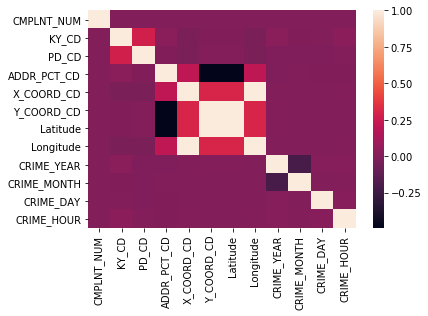

In [26]:
sns.heatmap(df.corr())
plt.show()

Dropping unecessaey columns and also columns with high correlation

In [27]:
df.columns

Index([u'CMPLNT_NUM', u'CMPLNT_FR_DT', u'CMPLNT_FR_TM', u'CMPLNT_TO_DT',
       u'CMPLNT_TO_TM', u'RPT_DT', u'KY_CD', u'PD_CD', u'PD_DESC',
       u'CRM_ATPT_CPTD_CD', u'LAW_CAT_CD', u'JURIS_DESC', u'BORO_NM',
       u'ADDR_PCT_CD', u'LOC_OF_OCCUR_DESC', u'PREM_TYP_DESC', u'PARKS_NM',
       u'HADEVELOPT', u'X_COORD_CD', u'Y_COORD_CD', u'Latitude', u'Longitude',
       u'Lat_Lon', u'Crime_Date_Time', u'CRIME_PERIOD', u'CRIME_YEAR',
       u'CRIME_MONTH', u'CRIME_DAY', u'CRIME_HOUR', u'OFNS_DESC'],
      dtype='object')

In [28]:
df.drop(['CMPLNT_TO_DT','CMPLNT_TO_TM','HADEVELOPT','RPT_DT','PARKS_NM','LOC_OF_OCCUR_DESC',
         'X_COORD_CD','Y_COORD_CD',
         'Lat_Lon','CMPLNT_NUM','CMPLNT_FR_DT','CMPLNT_FR_TM','PD_CD','PD_DESC'],axis=1,inplace=True)

In [29]:
df.head()

KY_CD CRM_ATPT_CPTD_CD   LAW_CAT_CD        JURIS_DESC    BORO_NM  \
0    113        COMPLETED       FELONY  N.Y. POLICE DEPT      BRONX   
1    101        COMPLETED       FELONY  N.Y. POLICE DEPT     QUEENS   
2    117        COMPLETED       FELONY  N.Y. POLICE DEPT  MANHATTAN   
3    344        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT     QUEENS   
4    344        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT  MANHATTAN   

   ADDR_PCT_CD    PREM_TYP_DESC   Latitude  Longitude     Crime_Date_Time  \
0         44.0   BAR/NIGHT CLUB  40.828848 -73.916661 2015-12-31 23:45:00   
1        103.0          UNKNOWN  40.697338 -73.784557 2015-12-31 23:36:00   
2         28.0            OTHER  40.802607 -73.945052 2015-12-31 23:30:00   
3        105.0  RESIDENCE-HOUSE  40.654549 -73.726339 2015-12-31 23:30:00   
4         13.0            OTHER  40.738002 -73.987891 2015-12-31 23:25:00   

  CRIME_PERIOD  CRIME_YEAR  CRIME_MONTH  CRIME_DAY  CRIME_HOUR  \
0     6PM-12AM        2015           12         31          23   
1     6PM-12AM        2015           12         31          23   
2     6PM-12AM        2015           12         31          23   
3     6PM-12AM        2015           12         31          23   
4     6PM-12AM        2015           12         31          23   

                         OFNS_DESC  
0                          FORGERY  
1  MURDER & NON-NEGL. MANSLAUGHTER  
2                  DANGEROUS DRUGS  
3     ASSAULT 3 & RELATED OFFENSES  
4     ASSAULT 3 & RELATED OFFENSES

In [30]:
df1 = df.copy()

Cleaning up the population dataset by dropping the unecessary columns

In [31]:
pop = population.copy()
pop.drop(['Age Group','1950 - Boro share of NYC total','1960 - Boro share of NYC total',
          '1970 - Boro share of NYC total','1980 - Boro share of NYC total',
          '1990 - Boro share of NYC total','2000 - Boro share of NYC total',
          '2010 - Boro share of NYC total','2020 - Boro share of NYC total',
          '2030 - Boro share of NYC total','2040 - Boro share of NYC total'], axis=1, inplace=True)

# <u> 3. Exploring the Dataset </u>

<b>New York City Crime Distribution<b>

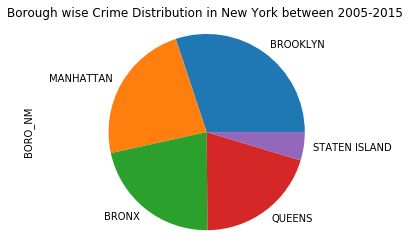

In [32]:
df.BORO_NM.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Borough wise Crime Distribution in New York between 2005-2015')

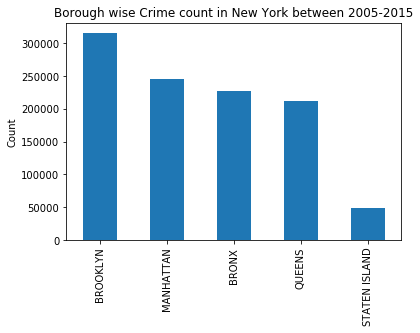

In [33]:
df['BORO_NM'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('Borough wise Crime count in New York between 2005-2015')
plt.show()

<b> Crime distribution as per Category i.e. Felony or Misdemeanor or Violation <b>

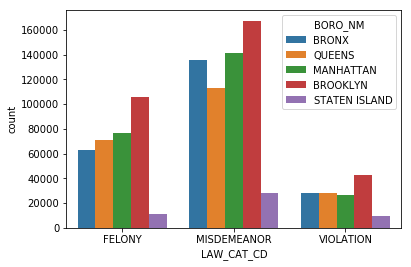

In [34]:
sns.countplot(x='LAW_CAT_CD', hue='BORO_NM', data=df)

Brooklyn crimes rates follow our expectation due to this borough having the largest population size; however, we expected Queens to have the second highest crime rate as this borough has the second largest population size.

<b>Top 5 Crimes per Borough<b>

In [35]:
df.groupby('BORO_NM').apply(lambda d: d.groupby('OFNS_DESC').size().nlargest(5)) #by borough by OFNS DESC top 5 crimes

BORO_NM        OFNS_DESC                     
BRONX          PETIT LARCENY                     32653
               ASSAULT 3 & RELATED OFFENSES      28961
               HARRASSMENT 2                     27959
               CRIMINAL MISCHIEF & RELATED OF    21643
               DANGEROUS DRUGS                   21334
BROOKLYN       PETIT LARCENY                     50199
               HARRASSMENT 2                     41910
               ASSAULT 3 & RELATED OFFENSES      35602
               CRIMINAL MISCHIEF & RELATED OF    31639
               GRAND LARCENY                     26551
MANHATTAN      PETIT LARCENY                     54309
               GRAND LARCENY                     35183
               HARRASSMENT 2                     26256
               ASSAULT 3 & RELATED OFFENSES      21507
               CRIMINAL MISCHIEF & RELATED OF    19994
QUEENS         PETIT LARCENY                     35185
               HARRASSMENT 2                     27640
               ASSA

<b>Top 10 Crimes accross New York City<b>

In [36]:
df.groupby('OFNS_DESC').size().sort_values(ascending=False).head(10)

OFNS_DESC
PETIT LARCENY                     180205
HARRASSMENT 2                     133149
ASSAULT 3 & RELATED OFFENSES      114414
CRIMINAL MISCHIEF & RELATED OF    102748
GRAND LARCENY                      96171
DANGEROUS DRUGS                    56865
OFF. AGNST PUB ORD SENSBLTY &      44754
FELONY ASSAULT                     43915
ROBBERY                            36795
BURGLARY                           34984
dtype: int64

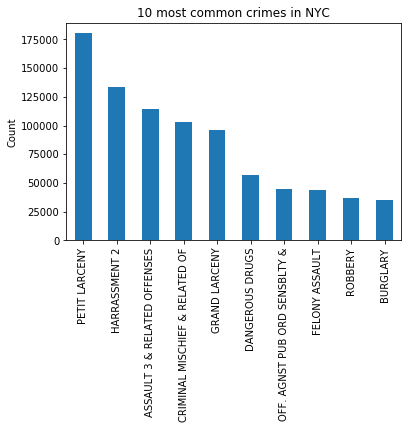

In [37]:
df['OFNS_DESC'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('10 most common crimes in NYC')
plt.show()

<b> Top 5 Premise Locations for a Crime to Occur <b>

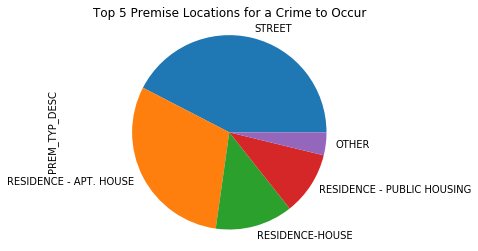

In [38]:
df.PREM_TYP_DESC.value_counts()[:5].plot(kind='pie')
plt.axis('equal')
plt.title('Top 5 Premise Locations for a Crime to Occur')

# <u> 4. Interesting Finding - 1 </u>

### Brief Summary 

A crime is most likely to occur between 12PM to 6PM and crimes rates peak during November and December. Specifically, Petit Larceny which occurs mostly between 3PM to 5PM

### Validity of Finding 

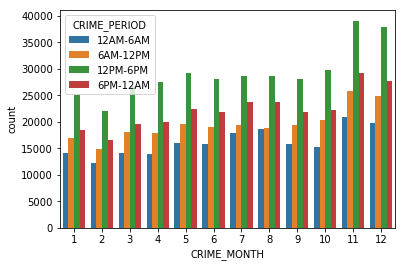

In [39]:
sns.countplot(x='CRIME_MONTH',hue='CRIME_PERIOD',data=df) 
#significantly more crime from 12pm-6pm and especially during November and December

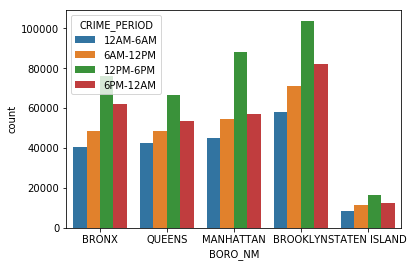

In [40]:
sns.countplot(x='BORO_NM',hue='CRIME_PERIOD',data=df)

In [41]:
PETIT_LARCENY = df[df.OFNS_DESC == 'PETIT LARCENY']

Most common premises where Petit Larceny occurs.

In [42]:
PETIT_LARCENY.groupby('PREM_TYP_DESC').size().sort_values(ascending=False).head(10)

PREM_TYP_DESC
STREET                    45323
DEPARTMENT STORE          18622
CHAIN STORE               17698
RESIDENCE - APT. HOUSE    16997
RESIDENCE-HOUSE            8157
DRUG STORE                 7247
COMMERCIAL BUILDING        7116
CLOTHING/BOUTIQUE          6204
GROCERY/BODEGA             4528
FOOD SUPERMARKET           4400
dtype: int64

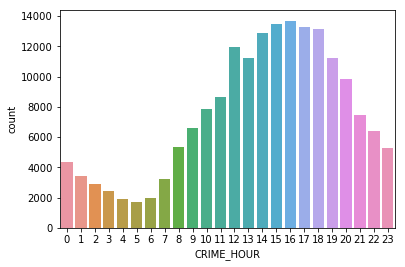

In [43]:
sns.countplot(x='CRIME_HOUR', data=PETIT_LARCENY) 

### Initial Insights

We looked into the most common crime and how this can be reduced. Petit larceny is the most common offense in New York by a large margin, occurring 180,229 times over our 10 year data set. By definition, Petit Larceny is theft which the value of property taken is generally less than $50. The above data show that this crime occurs the most on streets and department stores, which correspond to pickpocketing and shoplifting respectively. Generally, this is not a crime that can be stopped with increased police presence so we advise that the NYPD focus their efforts to more serious types of crime such as Felonies. However, a way that this crime can be reduced is through awareness or informational campaigns. The graphs shows that pickpocketing is most likely to happen from 12pm-6pm meaning that people generally have their guard down because the sun is out. The best way to decrease pickpocketing is for people to be more aware of their belongings and take precautions to safeguard their valuables. Shoplifting can be decreased if store owners invest in anti-theft measures (in-store cameras, ink tags, security guards).  There is a spike in occurences of Petit Larceny from 3pm-5pm--when people are commutting home from work. Given that pickpocketers rely on on their victims to have their guard down, a simple but effective way to reduce the number of pickpocket instances is to place signs in high pedestrian traffic areas to be aware of pickpocketing especially during rush hour (3-5pm) and to be more aware of their valuables.

### Further Analysis

We were expecting more crimes to occur between time period 12AM to 6AM as compared to 12PM to 6PM and therefore we decided to analyse this further. <br />Using the professor's recommendation, we decided to <b>Normalise</b> the total number of Petit Larceny crimes with respect to the the population awake at respective times.

<b>Considering ***Petit Larceny*** Crimes during time period <b>12PM to 6PM<b>

In [44]:
CRIMES_2015= df1.copy()
CRIMES_2015 = CRIMES_2015[(CRIMES_2015.CRIME_PERIOD == '12PM-6PM') & (CRIMES_2015.OFNS_DESC == 'PETIT LARCENY')]

Since the dataset consists of a majority of crimes for the year 2015, we carry out our further validation analysis only for <b>year 2015</b>

In [45]:
CRIMES_2015.index = CRIMES_2015.CRIME_YEAR
CRIMES_2015 = CRIMES_2015.ix[2015]
CRIMES_2015.head()

/Users/gurazbuhariwala/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


KY_CD CRM_ATPT_CPTD_CD   LAW_CAT_CD        JURIS_DESC    BORO_NM  \
CRIME_YEAR                                                                     
2015          341        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT     QUEENS   
2015          341        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT  MANHATTAN   
2015          341        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT     QUEENS   
2015          341        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT     QUEENS   
2015          341        COMPLETED  MISDEMEANOR  N.Y. POLICE DEPT      BRONX   

            ADDR_PCT_CD        PREM_TYP_DESC   Latitude  Longitude  \
CRIME_YEAR                                                           
2015              109.0     FOOD SUPERMARKET  40.756040 -73.828536   
2015               19.0       SMALL MERCHANT  40.768181 -73.963849   
2015              115.0          CHAIN STORE  40.756298 -73.878397   
2015              115.0      PUBLIC BUILDING  40.756298 -73.878397   
2015               52.0  COMMERCIAL BUILDING  40.863338 -73.896470   

               Crime_Date_Time CRIME_PERIOD  CRIME_YEAR  CRIME_MONTH  \
CRIME_YEAR                                                             
2015       2015-12-31 18:58:00     12PM-6PM        2015           12   
2015       2015-12-31 18:45:00     12PM-6PM        2015           12   
2015       2015-12-31 18:15:00     12PM-6PM        2015           12   
2015       2015-12-31 18:15:00     12PM-6PM        2015           12   
2015       2015-12-31 18:10:00     12PM-6PM        2015           12   

            CRIME_DAY  CRIME_HOUR      OFNS_DESC  
CRIME_YEAR                                        
2015               31          18  PETIT LARCENY  
2015               31          18  PETIT LARCENY  
2015               31          18  PETIT LARCENY  
2015               31          18  PETIT LARCENY  
2015               31          18  PETIT LARCENY

Unstandardised or Not Normalised Petit Larceny Crimes committed in the year 2015 between <b>12PM to 6PM</b>

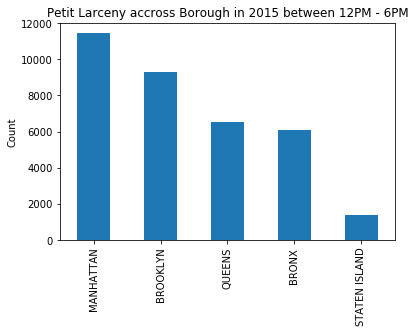

In [46]:
CRIMES_2015['BORO_NM'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Petit Larceny accross Borough in 2015 between 12PM - 6PM') 
plt.show()

In [47]:
CRIME_1 = CRIMES_2015['BORO_NM'].value_counts() 
BOROUGH_2015 = pd.DataFrame(CRIME_1).reset_index() 
BOROUGH_2015.columns=['Borough','Crimes']
BOROUGH_2015

Borough  Crimes
0      MANHATTAN   11459
1       BROOKLYN    9290
2         QUEENS    6535
3          BRONX    6085
4  STATEN ISLAND    1408

Since we have the population for year 2010 and year 2020, we need to extrapolate the population numbers for year 2015 

In [48]:
boro_pop1 = pop.copy()
boro_pop1.drop(0,inplace=True)
boro_pop1['Borough'] = boro_pop1['Borough'].map(lambda x: x.upper())
boro_pop1 = boro_pop1.transpose() #turn all values in 1st column into column headers
boro_pop1.reset_index(inplace=True)
boro_pop1[1] = boro_pop1[1].str.strip() #strip white space from first column header
boro_pop1[2] = boro_pop1[2].str.strip() #strip white space from second column header
boro_pop1[3] = boro_pop1[3].str.strip()
boro_pop1[4] = boro_pop1[4].str.strip()
boro_pop1[5] = boro_pop1[5].str.strip()
boro_pop1.columns = boro_pop1.iloc[0]    #turn index '0' with of boro names to column header

boro_pop1.drop(0,axis=0, inplace=True) #drop row with index 0
boro_pop1 = boro_pop1.rename(columns={'Borough':'Year'})
boro_pop1['Year'] = pd.to_datetime(boro_pop1['Year'], format='%Y')
boro_pop1.set_index('Year', inplace=True) #index the year column
boro_pop1 = boro_pop1.resample('A').sum()  #create years in between the decades provided in the pop dataframe
boro_pop1 = boro_pop1.apply(lambda x: x.str.replace(',',''))
boro_pop1.replace(np.nan,0, inplace=True)
boro_pop1 = boro_pop1.astype(int)

#merge dataframes
pop15 = boro_pop1.replace(0,np.nan).interpolate('linear')[65:66].transpose() #slice to get only the year 2015
pop15.columns = ['2015']
pop15.reset_index(inplace=True)
pop15.columns = ['Borough', 'Population_2015']
BORO_CRIMES_2015_12PM_6PM = BOROUGH_2015.merge(pop15, on='Borough')
BORO_CRIMES_2015_12PM_6PM

Borough  Crimes  Population_2015
0      MANHATTAN   11459        1612077.0
1       BROOKLYN    9290        2600681.5
2         QUEENS    6535        2290148.5
3          BRONX    6085        1415948.0
4  STATEN ISLAND    1408         477942.5

Considering <b>90%</b> of the population awake between <b>12PM to 6PM</b> to account for the people that work night shifts

In [49]:
BORO_CRIMES_2015_12PM_6PM ['POPULATION_2015_12PM_6PM'] = BORO_CRIMES_2015_12PM_6PM ['Population_2015']*0.9
BORO_CRIMES_2015_12PM_6PM

Borough  Crimes  Population_2015  POPULATION_2015_12PM_6PM
0      MANHATTAN   11459        1612077.0                1450869.30
1       BROOKLYN    9290        2600681.5                2340613.35
2         QUEENS    6535        2290148.5                2061133.65
3          BRONX    6085        1415948.0                1274353.20
4  STATEN ISLAND    1408         477942.5                 430148.25

Caculating Crime as a percentage of population awake from <b>12PM to 6PM</b>

In [50]:
BORO_CRIMES_2015_12PM_6PM['Ratio_12PM_6PM'] =  BORO_CRIMES_2015_12PM_6PM['Crimes'] / BORO_CRIMES_2015_12PM_6PM[
                                                                                    'POPULATION_2015_12PM_6PM']

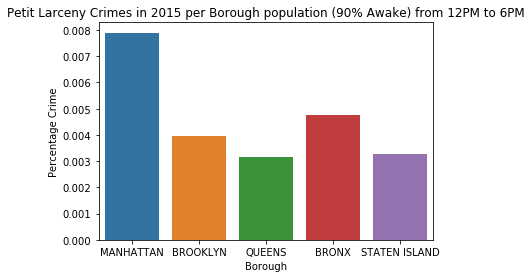

Borough  Crimes  Population_2015  POPULATION_2015_12PM_6PM  \
0      MANHATTAN   11459        1612077.0                1450869.30   
1       BROOKLYN    9290        2600681.5                2340613.35   
2         QUEENS    6535        2290148.5                2061133.65   
3          BRONX    6085        1415948.0                1274353.20   
4  STATEN ISLAND    1408         477942.5                 430148.25   

   Ratio_12PM_6PM  
0        0.007898  
1        0.003969  
2        0.003171  
3        0.004775  
4        0.003273

In [51]:
sns.barplot(x='Borough', y='Ratio_12PM_6PM', data=BORO_CRIMES_2015_12PM_6PM)
plt.ylabel('Percentage Crime')
plt.title('Petit Larceny Crimes in 2015 per Borough population (90% Awake) from 12PM to 6PM')
plt.show()
BORO_CRIMES_2015_12PM_6PM

<b>Now Considering time period 12AM to 6AM<b>

In [52]:
CRIMES_2015_12AM_6AM = df1.copy()
CRIMES_2015_12AM_6AM = CRIMES_2015_12AM_6AM[(CRIMES_2015_12AM_6AM.CRIME_PERIOD == '12AM-6AM') & 
                                            (CRIMES_2015_12AM_6AM.OFNS_DESC == 'PETIT LARCENY')]

Unstandardised or Not Normalised Petit Larceny Crimes committed in the year 2015 between <b>12AM to 6AM</b>

In [53]:
CRIMES_2015_12AM_6AM.index = CRIMES_2015_12AM_6AM.CRIME_YEAR
CRIMES_2015_12AM_6AM = CRIMES_2015_12AM_6AM.ix[2015]

/Users/gurazbuhariwala/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


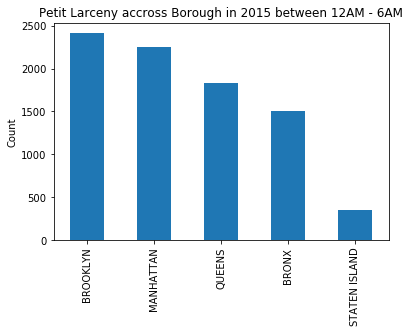

In [54]:
CRIMES_2015_12AM_6AM['BORO_NM'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Petit Larceny accross Borough in 2015 between 12AM - 6AM') 
plt.show()

In [55]:
CRIME_2 = CRIMES_2015_12AM_6AM['BORO_NM'].value_counts()
BOROUGH_2015_12AM_6AM = pd.DataFrame(CRIME_2).reset_index()
BOROUGH_2015_12AM_6AM.columns=['Borough','Crimes']

In [56]:
BORO_CRIMES_2015_12AM_6AM = BOROUGH_2015_12AM_6AM.merge(pop15, on='Borough')
BORO_CRIMES_2015_12AM_6AM

Borough  Crimes  Population_2015
0       BROOKLYN    2415        2600681.5
1      MANHATTAN    2247        1612077.0
2         QUEENS    1833        2290148.5
3          BRONX    1506        1415948.0
4  STATEN ISLAND     352         477942.5

In order to get a better understanding of how the variables affect the result, we decided to use a conservative and liberal estimate of the number of New Yorkers asleep from 12AM to 6AM. 
Using benchmarks from other cities, we used 10% of the population awake as the conservative estimate. New York being the City that never sleeps, we considered 25% of the population to be awake between 12AM to 6AM as the liberal estimate.

In [57]:
BORO_CRIMES_2015_12AM_6AM['POPULATION_2015_12AM_6AM_10_%'] = BORO_CRIMES_2015_12AM_6AM['Population_2015']*0.10
BORO_CRIMES_2015_12AM_6AM['POPULATION_2015_12AM_6AM_25_%'] = BORO_CRIMES_2015_12AM_6AM['Population_2015']*0.25
BORO_CRIMES_2015_12AM_6AM

Borough  Crimes  Population_2015  POPULATION_2015_12AM_6AM_10_%  \
0       BROOKLYN    2415        2600681.5                      260068.15   
1      MANHATTAN    2247        1612077.0                      161207.70   
2         QUEENS    1833        2290148.5                      229014.85   
3          BRONX    1506        1415948.0                      141594.80   
4  STATEN ISLAND     352         477942.5                       47794.25   

   POPULATION_2015_12AM_6AM_25_%  
0                     650170.375  
1                     403019.250  
2                     572537.125  
3                     353987.000  
4                     119485.625

Caculating Crime as a percentage of population awake from <b>12AM to 6AM</b>

In [58]:
BORO_CRIMES_2015_12AM_6AM['Ratio_12AM_6AM_10_%'] =  BORO_CRIMES_2015_12AM_6AM['Crimes'] / BORO_CRIMES_2015_12AM_6AM[
                                                                                    'POPULATION_2015_12AM_6AM_10_%']

In [59]:
BORO_CRIMES_2015_12AM_6AM['Ratio_12AM_6AM_25_%'] =  BORO_CRIMES_2015_12AM_6AM['Crimes'] / BORO_CRIMES_2015_12AM_6AM[
                                                                                    'POPULATION_2015_12AM_6AM_25_%']

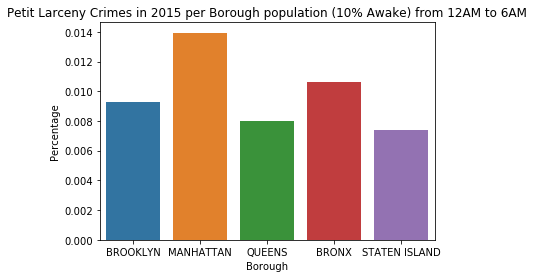

Borough  Crimes  POPULATION_2015_12AM_6AM_10_%  Ratio_12AM_6AM_10_%
0       BROOKLYN    2415                      260068.15             0.009286
1      MANHATTAN    2247                      161207.70             0.013939
2         QUEENS    1833                      229014.85             0.008004
3          BRONX    1506                      141594.80             0.010636
4  STATEN ISLAND     352                       47794.25             0.007365

In [60]:
sns.barplot(x='Borough', y='Ratio_12AM_6AM_10_%', data=BORO_CRIMES_2015_12AM_6AM)
plt.ylabel('Percentage')
plt.title('Petit Larceny Crimes in 2015 per Borough population (10% Awake) from 12AM to 6AM')
plt.show()
BORO_CRIMES_2015_12AM_6AM[['Borough','Crimes','POPULATION_2015_12AM_6AM_10_%','Ratio_12AM_6AM_10_%']]

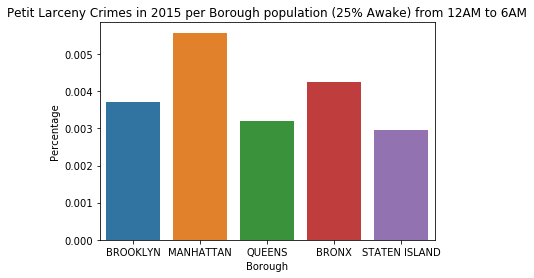

Borough  Crimes  POPULATION_2015_12AM_6AM_25_%  Ratio_12AM_6AM_25_%
0       BROOKLYN    2415                     650170.375             0.003714
1      MANHATTAN    2247                     403019.250             0.005575
2         QUEENS    1833                     572537.125             0.003202
3          BRONX    1506                     353987.000             0.004254
4  STATEN ISLAND     352                     119485.625             0.002946

In [61]:
sns.barplot(x='Borough', y='Ratio_12AM_6AM_25_%', data=BORO_CRIMES_2015_12AM_6AM)
plt.ylabel('Percentage')
plt.title('Petit Larceny Crimes in 2015 per Borough population (25% Awake) from 12AM to 6AM')
plt.show()
BORO_CRIMES_2015_12AM_6AM[['Borough','Crimes','POPULATION_2015_12AM_6AM_25_%','Ratio_12AM_6AM_25_%']]

Comparing the ratios of Petit Larceny crimes between 12AM to 6AM and 12PM to 6PM

In [62]:
X = BORO_CRIMES_2015_12AM_6AM[['Borough','Ratio_12AM_6AM_10_%','Ratio_12AM_6AM_25_%']]

In [63]:
Y = X.merge(BORO_CRIMES_2015_12PM_6PM,left_on='Borough',right_on='Borough',how='inner') #merging dataframes

In [64]:
Y = Y.loc[:,['Borough','Ratio_12AM_6AM_10_%','Ratio_12AM_6AM_25_%','Ratio_12PM_6PM']]

Normalised Crime ratio comparison assuming that 10% and 25% of the population is awake from 12AM-6AM and 90% of the population is awake from 12PM-6PM

In [65]:
Y

Borough  Ratio_12AM_6AM_10_%  Ratio_12AM_6AM_25_%  Ratio_12PM_6PM
0       BROOKLYN             0.009286             0.003714        0.003969
1      MANHATTAN             0.013939             0.005575        0.007898
2         QUEENS             0.008004             0.003202        0.003171
3          BRONX             0.010636             0.004254        0.004775
4  STATEN ISLAND             0.007365             0.002946        0.003273

## Conclusion 

Using a liberal estimate by assuming that 25% of the population is awake from 12AM-6AM shows that the percentage of the population committing Petit Larceny is similar or slightly less than the percentage of the population committing the same crime from 12PM-6PM. However, using a conservative estimate assuming 10% of the population is awake from 12AM-6AM shows that the likelyhood of an individual committing Petit Larceny increases marginally. Regardless of the which percentage of the population is awake from 12AM-6AM, Petit Larceny still remains to be the absoulte most common crime that occurs in New York. Moreover this is still a crime that will take active effort on the part of New Yorkers to prevent. Simple precautions like investing in home security, store anti-theft measures, or warning signs of pickpocketing will go a long way regardless of the time that this crime occurs. In conclusion, the NYPD should still focus on responding to different types of crime, namely felonies.


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# <u> 5. Interesting Finding - 2 </u>

### Brief Summary 

Using machine learning to predict the most likely type of crime to occur on the street, our findings is that crimes of possession and use of Dangerous Drugs has the highest probability of taking place on the street after Intoxicated & Impaired Driving.

### Machine Learning 

In [66]:
df1 = df.copy()

In [67]:
df2 = df1[['KY_CD','OFNS_DESC','BORO_NM','CRM_ATPT_CPTD_CD','ADDR_PCT_CD','JURIS_DESC','PREM_TYP_DESC','CRIME_PERIOD','CRIME_YEAR','CRIME_MONTH','CRIME_DAY','CRIME_HOUR']]

In [68]:
#df2.isnull().sum()
#df2.nunique()

In [69]:
df2.head()

KY_CD                        OFNS_DESC    BORO_NM CRM_ATPT_CPTD_CD  \
0    113                          FORGERY      BRONX        COMPLETED   
1    101  MURDER & NON-NEGL. MANSLAUGHTER     QUEENS        COMPLETED   
2    117                  DANGEROUS DRUGS  MANHATTAN        COMPLETED   
3    344     ASSAULT 3 & RELATED OFFENSES     QUEENS        COMPLETED   
4    344     ASSAULT 3 & RELATED OFFENSES  MANHATTAN        COMPLETED   

   ADDR_PCT_CD        JURIS_DESC    PREM_TYP_DESC CRIME_PERIOD  CRIME_YEAR  \
0         44.0  N.Y. POLICE DEPT   BAR/NIGHT CLUB     6PM-12AM        2015   
1        103.0  N.Y. POLICE DEPT          UNKNOWN     6PM-12AM        2015   
2         28.0  N.Y. POLICE DEPT            OTHER     6PM-12AM        2015   
3        105.0  N.Y. POLICE DEPT  RESIDENCE-HOUSE     6PM-12AM        2015   
4         13.0  N.Y. POLICE DEPT            OTHER     6PM-12AM        2015   

   CRIME_MONTH  CRIME_DAY  CRIME_HOUR  
0           12         31          23  
1           12         31          23  
2           12         31          23  
3           12         31          23  
4           12         31          23

Making a new column 'STREET' which has values <b>1</b> if a particular crime <b>DID OCCUR</b> on a street and <b>0</b> if it <b>DID NOT</b>

In [70]:
df2['STREET'] = (df2.PREM_TYP_DESC == 'STREET')*1.0

/Users/gurazbuhariwala/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [71]:
plot = df2.copy()

Dropping columns which are not required or may be correlated to one another or the target cell.

In [72]:
df2 = df2.drop(['PREM_TYP_DESC','KY_CD','CRM_ATPT_CPTD_CD','JURIS_DESC','CRIME_PERIOD'],axis=1) 

Make dummy variables for all categorical variables and making the complete dataframe into numeric form

In [73]:
df2 = pd.get_dummies(df2,columns=['OFNS_DESC','BORO_NM'],dummy_na=True)

Checking the correlation once again before training the set using the decision tree Classifier

In [74]:
corr = df2.corr()

In [75]:
#corr[corr<1]

In [76]:
df2.dropna(inplace=True)

Dropping the Target (dependent variable) from the training set X

In [77]:
X = df2.drop(['STREET'],axis = 1)

Y consists of the Target Column i.e. Street or No Street

In [78]:
Y = df2.STREET

In [79]:
Y.mean()

0.30552920902520808

#### almost 30% Crimes Occur on the Street !

### Decision Tree

<b>Building</b> a decision tree of <b>depth = 2</b> to find the probability of a crime occuring on a street or not.

In [80]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [81]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Visualizing</b> the decision tree

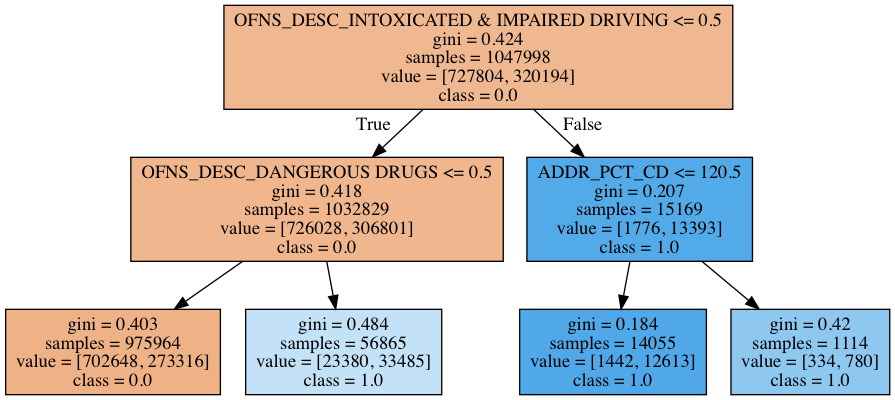

In [82]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

We thought Petit Larceny is the most likely common type of crime. However, the probability of Dangerous Drugs occuring on the street is much higher

### Validity of Finding 

In [83]:
DRUGS = plot[(plot.OFNS_DESC == 'DANGEROUS DRUGS')|
             (plot.OFNS_DESC == 'INTOXICATED & IMPAIRED DRIVING')|
             (plot.OFNS_DESC =='PETIT LARCENY')|
             (plot.OFNS_DESC =='HARRASSMENT 2')]

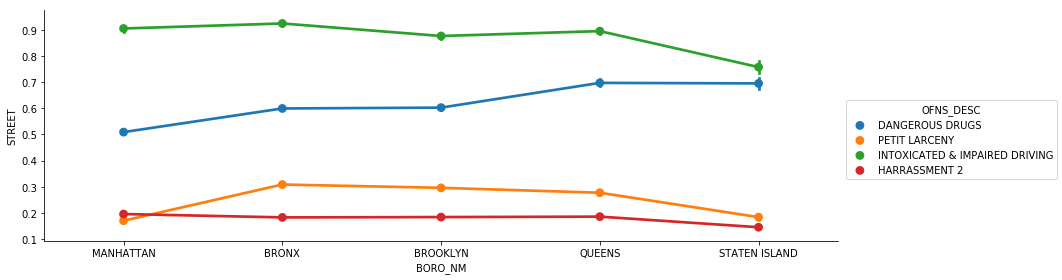

In [84]:
sns.factorplot(x='BORO_NM',y='STREET',hue='OFNS_DESC', data=DRUGS,kind='point',aspect=3)

Validating findings <b>using proportions<b>

In [85]:
PETIT_LARCENY = plot[plot.OFNS_DESC =='PETIT LARCENY']
PETIT_LARCENY_STREET = PETIT_LARCENY[PETIT_LARCENY.PREM_TYP_DESC=='STREET']

In [86]:
PETIT_LARCENY = PETIT_LARCENY.count().head(1).values[0]
PETIT_LARCENY_STREET = PETIT_LARCENY_STREET.count().head(1).values[0]

In [87]:
DANGEROUS_DRUGS = plot[plot.OFNS_DESC =='DANGEROUS DRUGS']
DANGEROUS_DRUGS_STREET = DANGEROUS_DRUGS[DANGEROUS_DRUGS.PREM_TYP_DESC=='STREET']

In [88]:
DANGEROUS_DRUGS = DANGEROUS_DRUGS.count().head(1).values[0]
DANGEROUS_DRUGS_STREET = DANGEROUS_DRUGS_STREET.count().head(1).values[0]

In [89]:
INTOX_DRIVING = plot[plot.OFNS_DESC =='INTOXICATED & IMPAIRED DRIVING']
INTOX_DRIVING_STREET = INTOX_DRIVING[INTOX_DRIVING.PREM_TYP_DESC=='STREET']

In [90]:
INTOX_DRIVING = INTOX_DRIVING.count().head(1).values[0]
INTOX_DRIVING_STREET = INTOX_DRIVING_STREET.count().head(1).values[0]

Proportion of <b>Petit Larceny</b> occuring on a <b>street</b>

In [91]:
PROP_LARCENY = (float(PETIT_LARCENY_STREET)/PETIT_LARCENY)*100
PROP_LARCENY

25.15080047723426

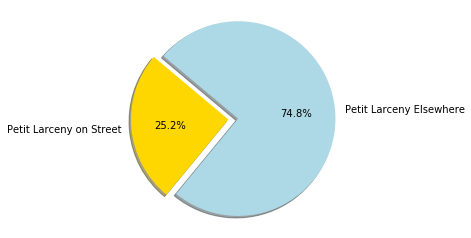

In [92]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Petit Larceny on Street', 'Petit Larceny Elsewhere'
sizes = [PROP_LARCENY, (100-PROP_LARCENY)]
colors = ['gold', 'lightblue']
explode = (0.1, 0,)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Proportion of a <b>Dangerous Drug</b> Crimes occuring on a <b>Street</b>

In [93]:
PROP_DRUGS = (float(DANGEROUS_DRUGS_STREET)/DANGEROUS_DRUGS)*100
PROP_DRUGS

58.885078695155194

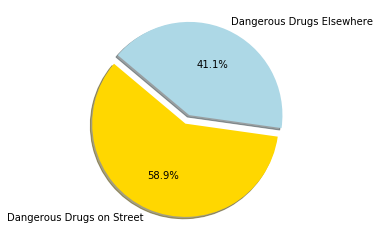

In [94]:
labels = 'Dangerous Drugs on Street', 'Dangerous Drugs Elsewhere'
sizes = [PROP_DRUGS, (100-PROP_DRUGS)]
colors = ['gold', 'lightblue']
explode = (0.1, 0,)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Proportion of a Intoxicated & Impaired Driving occuring on a street (this is obvious and therefore not plotted)

In [95]:
PROP_INTOX_DRIVING = (float(INTOX_DRIVING_STREET)/INTOX_DRIVING)
PROP_INTOX_DRIVING

0.8829191113455073

### Managerial Insights 

Moving on to crimes that the police can focus their effort and training on. 
We know that larceny is hard to enforce through police action.
Thus, we looked at crimes that police can have an impact on.
Given that the street is the most common premise where crimes occur, this is a good starting point.
Which crimes are most likely to occur on the street?
This is the type of crime that police should be trained to spot and handle because the majority of time spent
by police patrolling is on the street.
Using machine learning, we can predict that the most likely crime to occur on the street is the use or possession of 
dangerous drugs which is a class 4 felony. We advise that the NYPD concentrate their efforts or numbers on streets 
where crimes relating to dangerous drugs are most prevelant. This is where patrolling police can have the largest
impact.

#### Model Check for Accuracy and Precision

#### Hold-out sample

Split the data into 70% training and 30% test

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
#train_test_split(X,Y,test_size=0.3,random_state = 0)

This method train_test_split() return 4 things :

In [98]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.3,random_state = 0)

In [99]:
len(X_train)
len(Y_train)

733598

In [100]:
len(X_train)

733598

In [101]:
len(Y_train)

733598

In [102]:
len(X_test)

314400

In [103]:
len(X_train) / float(len(X))

0.6999994274798235


#### Using RandomForest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Predict 

In [106]:
cl.predict(X_test)

array([ 0.,  1.,  0., ...,  1.,  0.,  1.])

In [107]:
(cl.predict(X_test) == Y_test).mean()

0.73404580152671761

#### Predict on the test set

In [108]:
y_pred = cl.predict(X_test)

In [109]:
y_pred[:20]

array([ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.])

Every classifier will also give a prediction output with probability

In [110]:
cl.predict_proba(X_test)

array([[ 1.        ,  0.        ],
       [ 0.2       ,  0.8       ],
       [ 0.55      ,  0.45      ],
       ..., 
       [ 0.1       ,  0.9       ],
       [ 0.7       ,  0.3       ],
       [ 0.36666667,  0.63333333]])

In [111]:
cl.predict_proba(X_test)[:,1]

array([ 0.        ,  0.8       ,  0.45      , ...,  0.9       ,
        0.3       ,  0.63333333])

In [112]:
y_pred_proba = cl.predict_proba(X_test)[:,1]

In [113]:
y_pred_proba[:20]

array([ 0.  ,  0.8 ,  0.45,  0.3 ,  0.2 ,  0.7 ,  0.  ,  0.25,  0.1 ,
        0.  ,  0.7 ,  1.  ,  0.2 ,  0.1 ,  0.3 ,  0.1 ,  0.7 ,  0.1 ,
        0.45,  0.  ])

#### Confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
confusion_matrix(Y_test,y_pred)

array([[191340,  27178],
       [ 56438,  39444]])

#### Accuracy score (TP+TN)/ N

In [116]:
(y_pred == Y_test).mean()

0.73404580152671761

#### Precision score ( TP/(TP+FP) )

In [117]:
import sklearn.metrics as met

In [118]:
met.precision_score(Y_test,y_pred)

0.59205667797424277

In [119]:
#Y_test.mean()

#### Recall score ( TP/(TP+FN) )

In [120]:
met.recall_score(Y_test,y_pred)

0.41138065538891555

#### AUC score

In [121]:
met.roc_auc_score(Y_test,y_pred_proba)

0.72110657023156344

#### Cross Validation (KFold=10)

In [122]:
from sklearn.model_selection import KFold

In [123]:
nfolds = 10

In [124]:
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [125]:
avgCV_AUC = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,\
                                                    scoring='roc_auc').mean()

In [126]:
avgCV_AUC

0.72393892130756909

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## Mapping Crimes

In order to find our third finding, we decided to plot the crimes that occured on New Year's Eve and Superbowl Day to see if there was a difference between the two.

In [127]:
#!pip install folium
# This is required to be installed if not available in the system

In [128]:
import folium

In [129]:
df

KY_CD CRM_ATPT_CPTD_CD   LAW_CAT_CD           JURIS_DESC  \
0          113        COMPLETED       FELONY     N.Y. POLICE DEPT   
1          101        COMPLETED       FELONY     N.Y. POLICE DEPT   
2          117        COMPLETED       FELONY     N.Y. POLICE DEPT   
3          344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
4          344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
5          106        ATTEMPTED       FELONY     N.Y. POLICE DEPT   
6          235        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
7          118        COMPLETED       FELONY     N.Y. POLICE DEPT   
8          344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
9          341        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
10         341        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
11         341        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
12         109        COMPLETED       FELONY     N.Y. POLICE DEPT   
13         109        COMPLETED       FELONY     N.Y. POLICE DEPT   
14         113        COMPLETED       FELONY     N.Y. POLICE DEPT   
15         105        COMPLETED       FELONY     N.Y. POLICE DEPT   
16         109        COMPLETED       FELONY     N.Y. POLICE DEPT   
17         359        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
18         344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
19         351        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
20         235        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
21         104        COMPLETED       FELONY     N.Y. POLICE DEPT   
22         235        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
23         106        COMPLETED       FELONY     N.Y. POLICE DEPT   
24         118        COMPLETED       FELONY     N.Y. POLICE DEPT   
25         344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
26         344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
27         118        COMPLETED       FELONY     N.Y. POLICE DEPT   
28         235        COMPLETED  MISDEMEANOR  N.Y. HOUSING POLICE   
29         347        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
...        ...              ...          ...                  ...   
1048545    344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048546    361        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048547    352        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048548    107        ATTEMPTED       FELONY     N.Y. POLICE DEPT   
1048549    235        COMPLETED  MISDEMEANOR  N.Y. HOUSING POLICE   
1048550    235        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048551    678        COMPLETED    VIOLATION     N.Y. POLICE DEPT   
1048552    235        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048553    106        COMPLETED       FELONY     N.Y. POLICE DEPT   
1048554    347        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048555    109        COMPLETED       FELONY     N.Y. POLICE DEPT   
1048556    107        ATTEMPTED       FELONY     N.Y. POLICE DEPT   
1048557    126        COMPLETED       FELONY     N.Y. POLICE DEPT   
1048558    235        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048559    344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048560    105        COMPLETED       FELONY  N.Y. HOUSING POLICE   
1048561    233        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048562    344        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048563    105        ATTEMPTED       FELONY     N.Y. POLICE DEPT   
1048564    109        COMPLETED       FELONY     N.Y. POLICE DEPT   
1048565    113        COMPLETED       FELONY  N.Y. TRANSIT POLICE   
1048566    109        COMPLETED       FELONY  N.Y. TRANSIT POLICE   
1048567    105        COMPLETED       FELONY     N.Y. POLICE DEPT   
1048568    578        COMPLETED    VIOLATION     N.Y. POLICE DEPT   
1048569    341        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048570    341        COMPLETED  MISDEMEANOR     N.Y. POLICE DEPT   
1048571

In [130]:
cr_map = df[['Latitude','Longitude', 'CRIME_MONTH', 'CRIME_DAY', 'CRIME_YEAR']]
cr_map.dropna(inplace=True)

/Users/gurazbuhariwala/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Creating a new dataframe consisting of crimes that occured on December 31.

In [131]:
new_year_eve = cr_map[(cr_map.CRIME_MONTH==12) & (cr_map.CRIME_DAY==31)]

Map of New York

In [132]:
nye_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=10,
                        )

Plotting the New Year's Eve crimes on the map across all 5 boroughs.

In [133]:
for index, row in new_year_eve.iterrows():
    
    folium.CircleMarker(location=(row["Latitude"],
                              row["Longitude"]),
                    color="#E37222",
                    radius= 2,
                    fill=True).add_to(nye_map)

Creating new dataframe with crimes occuring on Superbowl Day for years 2015 and 2014. We used 2015 and 2014 only because most of our data comes from these two years.

In [134]:
superbowl = cr_map[((cr_map.CRIME_MONTH==2) & (cr_map.CRIME_DAY==1) &(cr_map.CRIME_YEAR==2015)) |
                   ((cr_map.CRIME_MONTH==2) & (cr_map.CRIME_DAY==2) &(cr_map.CRIME_YEAR==2014))]

In [135]:
sb_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=10,
                        )

Mapping crimes that happened on Superbowl day.

In [136]:
for index, row in superbowl.iterrows():
    
    folium.CircleMarker(location=(row["Latitude"],
                              row["Longitude"]),
                    color="#E37222",
                    radius= 2,
                    fill=True).add_to(sb_map)

In [137]:
sb_map

In [138]:
nye_map

Looking at the two maps, the distribution, density and location of crimes are identical. Nothing interesting pattern or observation could be found from here.

# <u> 6. Interesting Finding - 3 </u>

### Brief Summary

We thought there may be some interesting findings regarding the likelihood or probability of crimes occurring on the weekday or weekend so we tried to see if we could apply machine learning to predict this.

### Machine Learning

In [139]:
df3 = df1.copy()

Making a new column 'DAY_OF_WEEK' based on Crime Date Time to get which day of the week does the crime most likely occur. Meaning of the DAY_OF_WEEK [0 ,1 ,2 ,3 ,4 ,5 ,6] = ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]

In [140]:
df3['DAY_OF_WEEK'] = df3['Crime_Date_Time'].dt.dayofweek

Filtering Offense Description on the bases of Top 10 crimes

In [141]:
df3 = df3[(df3.OFNS_DESC == 'BURGLARY') |(df3.OFNS_DESC == 'ROBBERY')|(df3.OFNS_DESC == 'PETIT LARCENY')|
         (df3.OFNS_DESC == 'DANGEROUS DRUGS')|(df3.OFNS_DESC == 'FELONY ASSAULT')|
         (df3.OFNS_DESC == 'OFF. AGNST PUB ORD SENSBLTY &')| (df3.OFNS_DESC == 'GRAND LARCENY')|
          (df3.OFNS_DESC == 'CRIMINAL MISCHIEF & RELATED OF')| (df3.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES')|
         (df3.OFNS_DESC == 'HARRASSMENT 2')]  

In [142]:
df3 = df3[['KY_CD','OFNS_DESC','BORO_NM','CRM_ATPT_CPTD_CD',
           'ADDR_PCT_CD','JURIS_DESC','PREM_TYP_DESC','CRIME_PERIOD',
           'CRIME_YEAR','CRIME_MONTH','CRIME_DAY','CRIME_HOUR','DAY_OF_WEEK']]

Making a new column 'WEEKEND' which has values <b>1</b> if a particular crime <b>DID OCCUR</b> on a weekend and <b>0</b> if it <b>DID NOT</b>.
We included Friday as part of the weekend because we thought Friday night was more condusive to crimes occurring.

In [143]:
df3['WEEKEND'] = ((df3.DAY_OF_WEEK == 4) | (df3.DAY_OF_WEEK == 5) | (df3.DAY_OF_WEEK == 6))*1.0

In [144]:
df3 = df3.drop(['KY_CD','CRM_ATPT_CPTD_CD','JURIS_DESC','PREM_TYP_DESC','CRIME_PERIOD','DAY_OF_WEEK','CRIME_HOUR','CRIME_YEAR'],axis=1)

In [145]:
df3.head(10)

OFNS_DESC    BORO_NM  ADDR_PCT_CD  CRIME_MONTH  \
2                DANGEROUS DRUGS  MANHATTAN         28.0           12   
3   ASSAULT 3 & RELATED OFFENSES     QUEENS        105.0           12   
4   ASSAULT 3 & RELATED OFFENSES  MANHATTAN         13.0           12   
5                 FELONY ASSAULT   BROOKLYN         71.0           12   
6                DANGEROUS DRUGS  MANHATTAN          7.0           12   
8   ASSAULT 3 & RELATED OFFENSES      BRONX         48.0           12   
9                  PETIT LARCENY  MANHATTAN         19.0           12   
10                 PETIT LARCENY      BRONX         41.0           12   
11                 PETIT LARCENY  MANHATTAN         13.0           12   
12                 GRAND LARCENY  MANHATTAN         14.0           12   

    CRIME_DAY  WEEKEND  
2          31      0.0  
3          31      0.0  
4          31      0.0  
5          31      0.0  
6          31      0.0  
8          31      0.0  
9          31      0.0  
10         31      0.0  
11         31      0.0  
12         31      0.0

dropping rows with null values

In [146]:
df3.dropna(inplace=True)

#### Clustering

We tried to see if clustering would help us find out the predictors for crime occurring on the weekend

In [147]:
df4 = df3.copy()

Make dummy variables for all categorical variables and making the complete dataframe into numeric form

In [148]:
df3 = pd.get_dummies(df3,columns=['BORO_NM','ADDR_PCT_CD','OFNS_DESC'],dummy_na=True)

In [149]:
from sklearn.cluster import KMeans

In [150]:
clu = KMeans(n_clusters=3, random_state=0)
clu

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [151]:
clu.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [152]:
clu.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

Getting summary information on the clusters' characteristics

In [153]:
df3['cluster']=clu.labels_

In [154]:
df3.groupby('cluster').mean()

CRIME_MONTH  CRIME_DAY   WEEKEND  BORO_NM_BRONX  BORO_NM_BROOKLYN  \
cluster                                                                      
0           6.963064  15.504308  0.435777       0.217780          0.301456   
1           6.976408  25.713315  0.439522       0.218095          0.302662   
2           6.998033   5.402697  0.422561       0.215442          0.303495   

         BORO_NM_MANHATTAN  BORO_NM_QUEENS  BORO_NM_STATEN ISLAND  \
cluster                                                             
0                 0.238417        0.195219               0.047128   
1                 0.235900        0.196664               0.046679   
2                 0.234686        0.199302               0.047075   

         BORO_NM_nan  ADDR_PCT_CD_1.0      ...        OFNS_DESC_BURGLARY  \
cluster                                    ...                             
0                0.0         0.012123      ...                  0.041701   
1                0.0         0.011849      ...                  0.043177   
2                0.0         0.011819      ...                  0.039461   

         OFNS_DESC_CRIMINAL MISCHIEF & RELATED OF  OFNS_DESC_DANGEROUS DRUGS  \
cluster                                                                        
0                                        0.119996                   0.070544   
1                                        0.117954                   0.061623   
2                                        0.127293                   0.070003   

         OFNS_DESC_FELONY ASSAULT  OFNS_DESC_GRAND LARCENY  \
cluster                                                      
0                        0.051216                 0.113279   
1                        0.053799                 0.113069   
2                        0.051069                 0.115499   

         OFNS_DESC_HARRASSMENT 2  OFNS_DESC_OFF. AGNST PUB ORD SENSBLTY &  \
cluster                                                                     
0                       0.157470                                 0.052067   
1                       0.157951                                 0.051514   
2                       0.157856                                 0.055508   

         OFNS_DESC_PETIT LARCENY  OFNS_DESC_ROBBERY  OFNS_DESC_nan  
cluster                                                             
0                       0.215168           0.043768            0.0  
1                       0.217805           0.044800            0.0  
2                       0.207536           0.042211            0.0  

[3 rows x 98 columns]

Since we were unable to find any interesting finding from Clustering for our data set, we decided to again go for Decision Tree to get our third finding.

### Decision Tree

In [155]:
df4 = pd.get_dummies(df4,columns=['BORO_NM','ADDR_PCT_CD'],dummy_na=True)

Dropping the Target (dependent variable) from the training set X

In [156]:
X = df4.drop(['WEEKEND','OFNS_DESC'],axis=1)

Y consists of the Target Column i.e. Weekend or Not a Weekend

In [157]:
Y = df4.WEEKEND

Checking for unbalanced data

In [158]:
Y.mean()

0.43263676852697691

#### almost 43% Crimes Occur on the Weekend !

<b>Building</b> a decision tree of <b>depth = 2</b> to find the probability of a crime occuring on a weekend or not.

In [159]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [160]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Visualizing</b> the decision tree

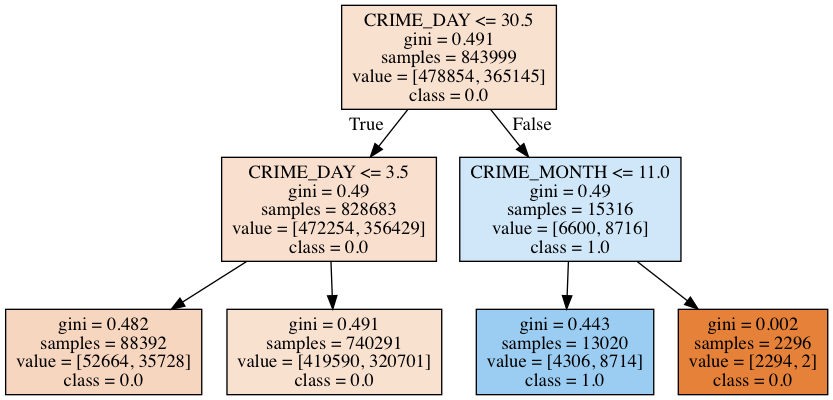

In [161]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

From January to November, for months that have 31 days, crimes are most likely to occur on the last day if it is a weekend.

### Validity of Findings

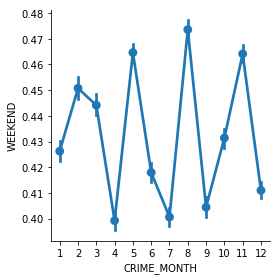

In [162]:
sns.factorplot(x='CRIME_MONTH',y='WEEKEND',data=df4, kind='point')

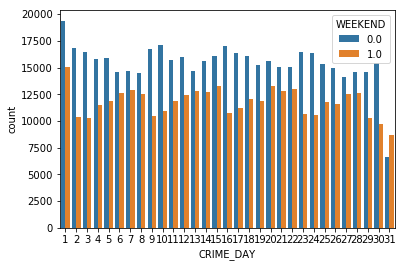

In [163]:
sns.countplot(x='CRIME_DAY',hue='WEEKEND',data=df4)

### Managerial Insights 

From January to November, if the 31st falls on a weekend, there is an increased likelihood of the top 10 crimes occurring. With this in mind, we recommened that the NYPD increase the number of police patrolling as well as keep the force on high alert. Additionally, New Yorkers should take extra precautions on days that fit these conditions. New Yorkers and visitors should avoid placing themselves in situations that increase their likelihood of being targeted as a victim.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>